![AlphaToOmega](https://i.imgur.com/JdERPuK.png)

## Machine Learning Study Week3

## : Lec 8 ~ 10

### 2018년 01월 09일 안상호

뉴럴 네트워크, 딥러닝

이 자료는 전 홍콩 과기대 교수님이신 김성훈 교수님의 [***모두를 위한 딥러닝***](https://www.youtube.com/playlist?list=PLlMkM4tgfjnLSOjrEJN31gZATbcj_MpUm) 강의를 기본으로 하여 [***밑바닥 부터 시작하는 딥러닝***](http://www.hanbit.co.kr/store/books/look.php?p_code=B8475831198)과 앤드류 응 교수님의 [***Machine Learning***](https://www.coursera.org/learn/machine-learning)으로 부족한 부분은 보완하여 작성되었습니다

---

### 목차

1. **Lec08**: 딥러닝의 기본 개념  
2. **Lec09**: XOR 문제 해결 
3. **Lec10**: Activation 함수들...
4. **Optional**: Tensor Manipulation

> 사실 목차 4번은 딥러닝을 구현하는데 있어서 초석과도 같으므로 먼저 이해한 다음에 처음 목차로 돌아가는 것이 좋을 것 같다는 개인적인 생각!

---


## Lec08: 딥러닝(신경망)의 기본 개념 

### 1.1. 왜 딥러닝을 사용할까?

지금까지의 주차별 스터디를 통해 **Linear Regression**그리고 **Logistic Regression (Classification)**에 대해서 공부해보았습니다. 

사실 지금까지 공부해본 것 만으로도 데이터들과 함께 많은 문제를 해결해 나갈 수 있을 것입니다. 

하지만 앤드류 응 교수님의 말씀에 따르면 현실의 문제는 선형으로만 나타내기에는 쉽지 않고 비선형적으로 접근해야하는 경우가 대다수라고 말씀하셨습니다. 

그래서 비선형으로 나타낼 필요가 있는 경우의 예시로 다음과 같은 그림을 보여주셨습니다. 
![](https://fuyangliudk.files.wordpress.com/2015/12/1-motivation-1.jpg?w=500)  

$y$를 설명할 feature들이 약 100개 정도라고 가정했을 때 (여기서는 `집값` 예측에 필요한 `집 사이즈`, `침실 갯수` 등등 ) 

이를 단순히 선형 식으로 나타내면 $z = W_0 + W_1x_1 + W_2x_2 + ... + W_{100}x_{100}$이 되고, 이를 `Sigmoid` 함수 $g$에 넣으면 $g(z)$가 됩니다. 

하지만 위의 예시는 단순한 선형 수식 보다는 더욱 정교한 수식이 필요하기 때문에, feature들 간의 곱을 통해 다항식을 구성할 필요가 있습니다.

이렇게 하면 보다 정교하게 경계를 나눌 수 있기는 하나, 당장 feature들의 제곱 값만 사용하더라도 $100^2$에 해당하는 연산량이 발생하며,

실제로 정교한 경계를 만들기 위해서는 더 많은 수의 연산을 필요로 할 것입니다. 

이러한 특징 때문에 단순히 지금까지 배운 선형, 그리고 로지스틱 회귀 방법 만으로는 feature가 많은 데이터를 다룰 때 한계에 부딪히게 될 것이고, 

따라서 저희는 복잡한 비선형 가설을 학습하는 더욱 효과적이고 효율적인 방법을 필요로 하는데, ***Neural Network(신경망)***가 바로 그 해답인 것입니다. 

---

### 1.2. 퍼셉트론

> 퍼셉트론은 프랑크 로젠블라트가 1957년에 고안한 알고리즘으로, 다수의 신호를 입력으로 받아 하나의 신호를 출력한다. 

정말 오래전에 알려진 알고리즘을 왜 첫번째로 소개하냐는 질문에 대한 답은 이 `퍼셉트론`이 `신경망`의 기원이 되는 알고리즘이기 때문입니다. 

다음과 같은 다이어그램 구조로 나타낼 수 있습니다.

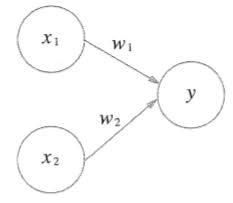

그림에서 $x_1$, $x_2$는 입력신호, $y$는 출력신호, 그리고 $w_1$과 $w_2$는 가중치를 의미합니다.

또한 그림의 원은 **뉴런** 혹은 **노드**라고 부르며, 입력신호가 뉴런에 보내질 때 고유한 가중치가 곱해지게 됩니다.

이들의 총합이 특정한 한계(**임계값**)를 넘을 때만 1을 출력하게 되고, 이 때 뉴런이 **활성화(Activation)** 되었다고 합니다. 


\begin{equation}
  y = \left \{
  \begin{aligned}
    &0 && \ (w_1x_1 + w_2x_2 \leq \theta) \\
    &1 && \ (w_1x_1 + w_2x_2 > \theta)
  \end{aligned} \right.
\end{equation} 

#### 1.2.1. AND 게이트

두 입력이 모두 1일 경우만 1을 출력, 나머지는 0출력

| $x_1$  | $x_2$ | $y$ |
| :----------: | :----------: | :----------: |
| 0 | 0 | 0 |
| 1 | 0 | 0 |
| 0 | 1 | 0 |
| 1 | 1 | 1 |

- 함수


In [1]:
def AND_node(x1, x2):
    w1, w2 = 0.5, 0.5
    return x1*w1 + x2*w2

print(AND_node(0,0), AND_node(1,0), AND_node(0,1), AND_node(1,1))

(0.0, 0.5, 0.5, 1.0)


임계값이 0.5인 것을 확인할 수 있습니다.

In [2]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

In [3]:
print(AND(0,0), AND(1,0), AND(0,1), AND(1,1))

(0, 0, 0, 1)


#### 1.2.2. OR 게이트

두 입력 중 하나만 1이라도 1을 출력, 나머지는 0출력

| $x_1$  | $x_2$ | $y$ |
| :----------: | :----------: | :----------: |
| 0 | 0 | 0 |
| 1 | 0 | 1 |
| 0 | 1 | 1 |
| 1 | 1 | 1 |

- 함수

In [4]:
def OR_node(x1, x2):
    w1, w2 = 0.5, 0.5
    return x1*w1 + x2*w2

print(AND_node(0,0), AND_node(1,0), AND_node(0,1), AND_node(1,1))

(0.0, 0.5, 0.5, 1.0)


임계값을 0으로 두면 나눌 수 있음을 확인할 수 있습니다.

In [5]:
def OR(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

In [6]:
print(OR(0,0), OR(1,0), OR(0,1), OR(1,1))

(0, 1, 1, 1)


#### 1.2.3. 가중치(Weight)와 편향(Bias)의 도입 

앞에서 구현한 게이트들은 직관적이고 알기 쉽지만, 신경망까지 연결되어야 하므로 수식이 약간 수정되어야할 필요가 있습니다.

$\theta$를 $-b$로 치환하고 좌변으로만 넘겨주면 되는 간단한 과정입니다!

\begin{equation}
  y = \left \{
  \begin{aligned}
    &0 && \ (b + w_1x_1 + w_2x_2 \leq 0) \\
    &1 && \ (b + w_1x_1 + w_2x_2 > 0)
  \end{aligned} \right.
\end{equation} 

이제 가중치와 입력 신호의 곱에 편향을 합하여 기준 값인 0을 넘는지 넘지 않는지로 해석할 수 있게 되었습니다.

이제 위의 새로운 수식처럼 `AND` 게이트와 `OR` 게이트의 코드를 수정해보도록 하겠습니다. 

- `numpy`

입력신호와 가중치의 곱을 앞에서는 하드코딩 방식으로 작성하였으나, numpy array를 통해 원소끼리 곱하면 훨씬 효율적으로 코드의 작성이 가능합니다. 

In [7]:
import numpy as np 

x = np.array([0, 1]) # 입력
w = np.array([0.5, 0.5]) # 가중치
b = -0.7

print("w1x1 + w2x2 + b = 약 {}".format(np.sum(w*x) + b))
np.sum(w*x) + b

w1x1 + w2x2 + b = 약 -0.2


-0.19999999999999996

$w_1x_1 + w_2x_2$의 식을 원소들 간의 곱을 한 후 모두 더한다는 Vectorization으로 표현한 것이고, 여기에 편향 $b$를 더하였습니다.

이미 알고있으신 분들도 있겠지만, 지금까지 ***tensorflow***로 Build 했던 `hypothesis`들이 바로 이러한 연산 체계, 특히 `numpy`의 

연산 체계를 따르고 있다는 것을 확인하실 수 있을 것입니다.

> hypothesis = tf.matmul(W, X) + b  

<br/>
- `AND` 게이트

In [8]:
import numpy as np 

def AND(x1, x2):
    x = np.array([x1, x2]) # 입력
    w = np.array([0.5, 0.5]) # 가중치
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    elif tmp > 0:
        return 1

In [9]:
print(AND(0,0), AND(1,0), AND(0,1), AND(1,1))

(0, 0, 0, 1)


- `NAND` 게이트

`AND` 게이트의 결과만 반대로!

즉, $Weight$와 $Bias$ 부호만 반대로 바꾸어주면 작동하게 됩니다.

In [10]:
import numpy as np 

def NAND(x1, x2):
    x = np.array([x1, x2]) # 입력
    w = np.array([-0.5, -0.5]) # 가중치
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    elif tmp > 0:
        return 1

In [11]:
print(NAND(0,0), NAND(1,0), NAND(0,1), NAND(1,1))

(1, 1, 1, 0)


- `OR` 게이트

In [12]:
import numpy as np 

def OR(x1, x2):
    x = np.array([x1, x2]) # 입력
    w = np.array([0.5, 0.5]) # 가중치
    b = 0
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    elif tmp > 0:
        return 1

In [13]:
print(OR(0,0), OR(1,0), OR(0,1), OR(1,1))

(0, 1, 1, 1)


이렇듯 `OR`과 `AND`는 선형으로 풀어낼 수 있다는 것을 확인할 수 있었습니다.

하지만 **배타적 논리합**을 나타내는 `XOR`게이트인데 마빈 민스키와 시모어 페퍼트는 저서 "퍼셉트론"에서 

단층 퍼셉트론은 XOR 연산이 불가능하지만, 다층 퍼셉트론으로는 XOR 연산이 가능함을 보였는데, 이는 퍼셉트론은 

단순한 선형 분류기에 불과하며, 간단한 `XOR` 문제조차도 풀어낼 수 없다는 것을 의미합니다. 

<div style="display: inline-block; float:left;" markdown="1">![](http://solarisailab.com/wp-content/uploads/2017/05/minsky_book-191x300.jpg)</div>

![](http://solarisailab.com/wp-content/uploads/2017/05/xor_limitation.gif)

<br/><br/><br/>
<br/><br/><br/>

이는 이후 인공 신경망의 침체기로 이어진다.

#### 1.2.4. Multi-Layer Perceptrons의 등장

| $x_1$  | $x_2$ | $s_1$ | $s_2$ | $y$ |
| :----------: | :----------: | :----------: | :----------: | :----------: |
| 0 | 0 | 1 | 0 | 0
| 1 | 0 | 1 | 1 | 1
| 0 | 1 | 1 | 1 | 1
| 1 | 1 | 0 | 1 | 0


In [14]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [15]:
print(XOR(0, 0), XOR(1, 0), XOR(0, 1), XOR(1, 1))

(0, 1, 1, 0)


기존에 만들었던 단층 퍼셉트론들을 조합해서 (층을 쌓아서) 다양한 것을 표현할 수 있다!

---

### 1.3. 신경망

`퍼셉트론`은 가중치를 설정하는 작업을 여전히 사람이 수동으로 진행해야만 했습니다. 

`신경망`은 가중치 매개변수의 적절한 값을 자동으로 학습한다는 점에서 `퍼셉트론`과는 큰 차이가 있는 것입니다.

지금까지 저희가 사용해온 학습 알고리즘들이 바로 자동으로 학습하는 과정인 것입니다.

#### 1.3.1. 신경망의 예 

![](https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Colored_neural_network.svg/300px-Colored_neural_network.svg.png)

가장 왼쪽이 **입력층**, 맨 오른쪽이 **출력층**, 그리고 중간 줄을 **은닉층**이라고 합니다.

위의 신경망은 **은닉층**을 제외하고 2층 신경망이라고 합니다. 

1 레이어에서 3개의 유닛을 가지고 있고, 2 레이어에서 3개의 유닛을 가지고 있다면, $s_{j+1} \times s_j + 1 = 3\times4$의 가중치 차원 필요 

(원래 1레이어에서는 편향이 반영되지 않았기 때문에)

#### 1.3.2. 활성화 함수

입력 신호의 총합을 출력 신호로 변환하는 함수를 일반적으로 **활성화 함수**(activation function)라고 합니다.

(단층) 퍼셉트론과의 가장 큰 차이점 중 하나로, 변환된 신호를 전달해줄 수 있게 됩니다. 

활성화 함수의 특징을 시각화를 통해 나타내보도록 하겠습니다.

- 시그모이드 함수

로지스틱에서 활용했던 바로 그 함수입니다. 

신경망에서도 자주 쓰이게 되는 함수이나 한계점이 존재 합니다. 

**Ex)** non Zero-Centered

$$h(x) = \frac {1} {1+ e^{-x}}$$

In [3]:
import numpy as np 
import matplotlib.pylab as plt

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([ 0.26894142,  0.73105858,  0.88079708])

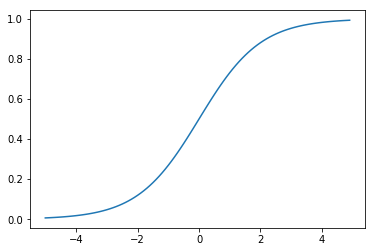

In [8]:
x = np.arange(-5.0, 5.0, 0.1)

y = sigmoid(x)
plt.plot(x, y)

- ReLU (Rectified Linear Unit)

> 입력이 0이 넘으면 그 입력을 그대로 출력하고, 0 이하면 0을 출력한다. 

앞의 `XOR` 해결 문제에서는 `sigmoid`를 사용해서 해결하지만 후반부에서는 `ReLU`를 활성화 함수로 사용하게 됩니다.

In [9]:
import numpy as np

def relu(x):
    return np.maximum(0, x)

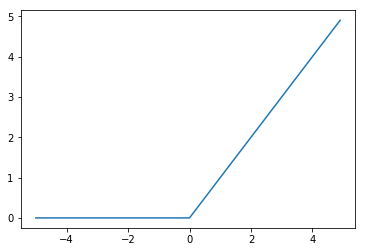

In [10]:
x = np.arange(-5.0, 5.0, 0.1)

y = relu(x)
plt.plot(x, y)

---

## Lec09: XOR 문제 해결

위에서 학습한 함수들을 텐서플로우에서도 당연히 제공합니다.  

우선 신경망을 사용하지 않고 기존의 방법대로 학습을 하는 방법과 신경망을 사용해서, 즉 층을 쌓아서 문제를 해결하는 경우를 비교해보도록 하겠습니다. 

### 2.1. Without Neural Network (단층 퍼셉트론)

- Build

In [1]:
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  # for reproducibility
learning_rate = 0.1

x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]
y_data = [[0],
          [1],
          [1],
          [0]]
x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

W = tf.Variable(tf.random_normal([2, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(tf.matmul(X, W)))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                       tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

- Run

In [2]:
# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})
        if step % 2000 == 0:
            print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W))

    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: {}\nCorrect: {}\nAccuracy: {}".format(h, c, a))

(0, 0.87597954, array([[ 0.78635669],
       [ 0.66282612]], dtype=float32))
(2000, 0.69314718, array([[ 0.00010906],
       [ 0.00010861]], dtype=float32))
(4000, 0.69314718, array([[  1.32805582e-07],
       [  1.33863324e-07]], dtype=float32))
(6000, 0.69314718, array([[  1.32805582e-07],
       [  1.33863324e-07]], dtype=float32))
(8000, 0.69314718, array([[  1.32805582e-07],
       [  1.33863324e-07]], dtype=float32))
(10000, 0.69314718, array([[  1.32805582e-07],
       [  1.33863324e-07]], dtype=float32))

Hypothesis: [[ 0.5]
 [ 0.5]
 [ 0.5]
 [ 0.5]]
Correct: [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
Accuracy: 0.5


### 2.2. With Neural Network (다층 퍼셉트론)

- Build

In [3]:
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  # for reproducibility
learning_rate = 0.1

x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]
y_data = [[0],
          [1],
          [1],
          [0]]
x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

W1 = tf.Variable(tf.random_normal([2, 2]), name='weight1')
b1 = tf.Variable(tf.random_normal([2]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([2, 1]), name='weight2')
b2 = tf.Variable(tf.random_normal([1]), name='bias2')

hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                       tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

- Run

In [4]:
# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})
        if step % 2000 == 0:
            print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run([W1, W2]))

    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: {}\nCorrect: {}\nAccuracy: {}".format(h, c, a))


(0, 1.2737583, [array([[ 2.13551426, -0.0782264 ],
       [ 0.04496152, -0.48487958]], dtype=float32), array([[-0.69574881],
       [-1.32445216]], dtype=float32)])
(2000, 0.65549606, [array([[ 2.07273817, -1.68272102],
       [ 0.19714457, -1.69658661]], dtype=float32), array([[-0.34937105],
       [-1.57771969]], dtype=float32)])
(4000, 0.18387526, [array([[ 2.90476942, -4.84191084],
       [ 2.86158252, -4.7247839 ]], dtype=float32), array([[-4.92141819],
       [-5.89312267]], dtype=float32)])
(6000, 0.047565714, [array([[ 4.11792994, -5.72245836],
       [ 4.10970831, -5.67508078]], dtype=float32), array([[-7.91211081],
       [-8.09190559]], dtype=float32)])
(8000, 0.025237646, [array([[ 4.57616377, -6.09185648],
       [ 4.57052517, -6.05989552]], dtype=float32), array([[-9.15556526],
       [-9.17619514]], dtype=float32)])
(10000, 0.016905479, [array([[ 4.84162521, -6.31606579],
       [ 4.83712149, -6.29090977]], dtype=float32), array([[-9.92119026],
       [-9.87894821]], dty

### 2.3. Back Propagation: 역전파